In [31]:
# 1. Exploratory Data Analysis

# 1.1 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.2 Load dataset
data = pd.read_csv('glass.csv')

# 1.3 Inspect data
print(data.head())
print(data.info())
print(data['Type'].value_counts())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
Type


In [32]:
# 1.4 Check for missing values
print(data.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


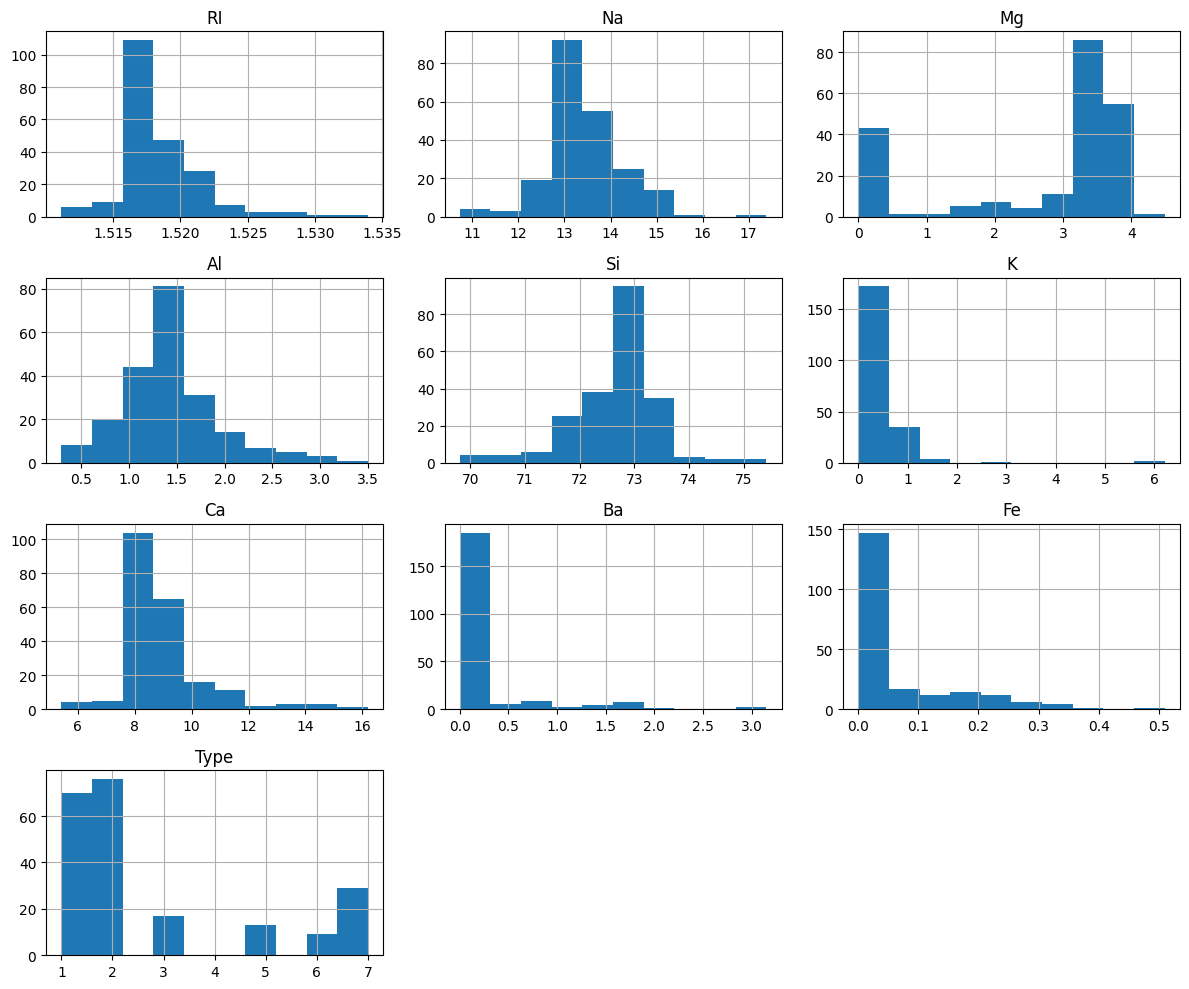

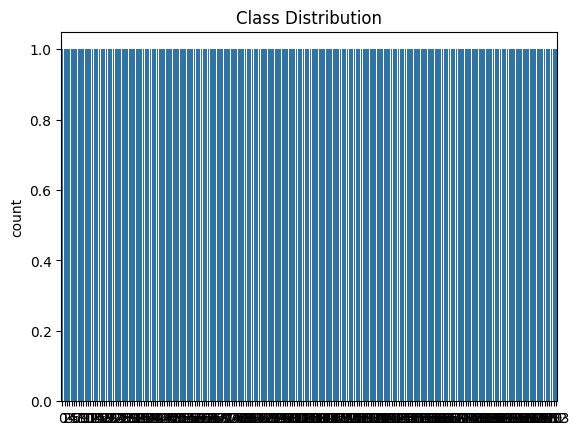

In [33]:
# 1.5 Visualize feature distribution and class imbalance:
# Feature histograms
data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

# Class imbalance bar plot
sns.countplot(data['Type'])
plt.title('Class Distribution')
plt.show()

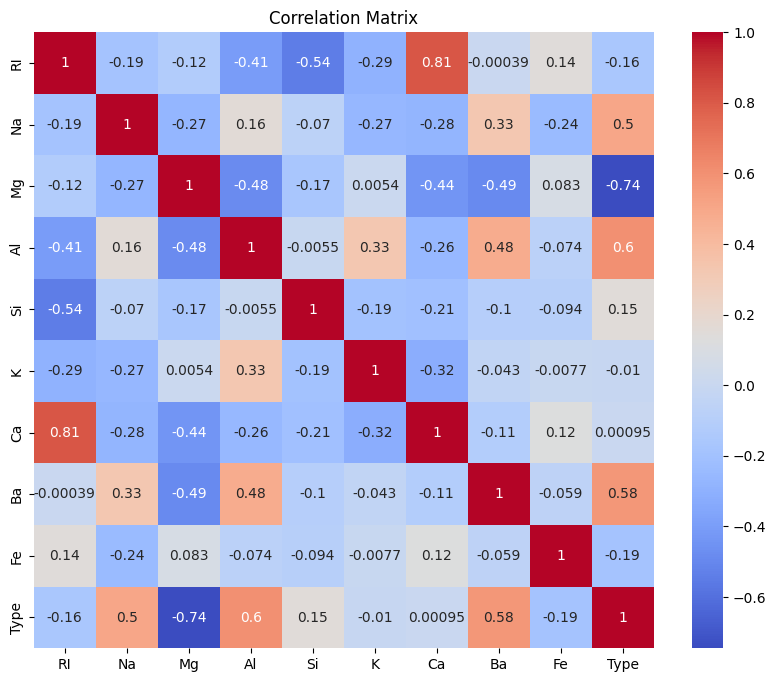

In [34]:
# 1.6 Correlation analysis heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
# 2. Data Preprocessing

# 2.1 Feature scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('Type', axis=1)
y = data['Type']

# 2.2 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 2.3 Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# 3. Model Building

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 3.1 Instantiate classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(class_weight='balanced', probability=True)
}

In [49]:
# 3.2 Train models

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name} trained.")

Logistic Regression trained.
Decision Tree trained.
Random Forest trained.
KNN trained.
SVM trained.



--- Logistic Regression ---
Accuracy: 0.581
Precision: 0.669
Recall: 0.581
F1-score: 0.575
Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.57      0.64        14
           2       0.67      0.27      0.38        15
           3       0.20      0.67      0.31         3
           5       0.50      1.00      0.67         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.58        43
   macro avg       0.60      0.75      0.62        43
weighted avg       0.67      0.58      0.58        43



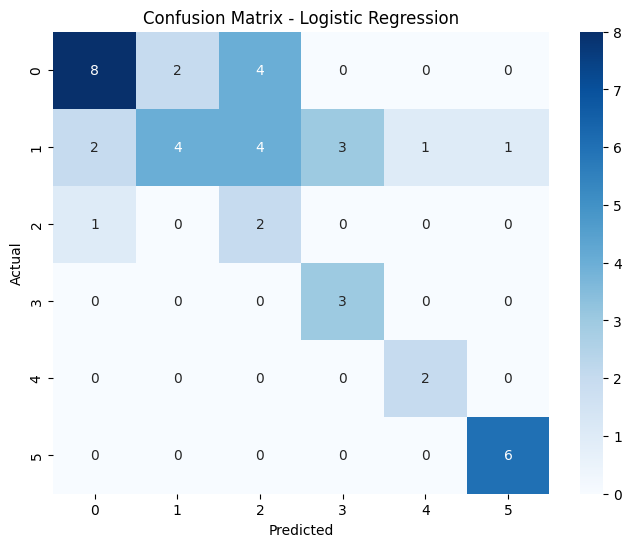


--- Decision Tree ---
Accuracy: 0.651
Precision: 0.686
Recall: 0.651
F1-score: 0.650
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.71      0.69        14
           2       0.64      0.47      0.54        15
           3       0.43      1.00      0.60         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         6

    accuracy                           0.65        43
   macro avg       0.68      0.75      0.68        43
weighted avg       0.69      0.65      0.65        43



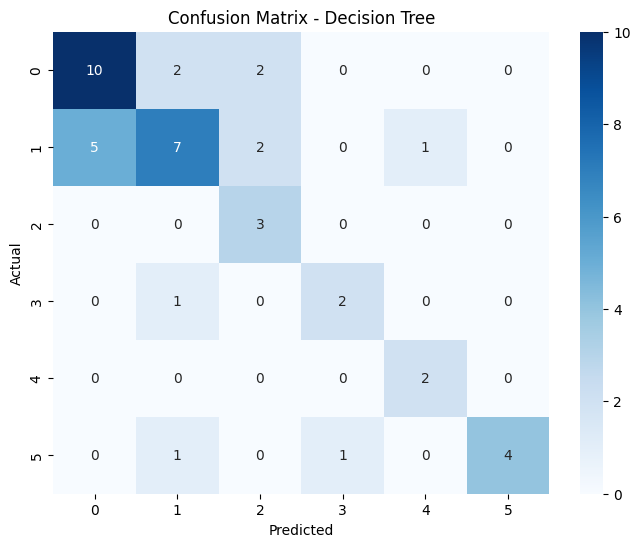


--- Random Forest ---
Accuracy: 0.791
Precision: 0.800
Recall: 0.791
F1-score: 0.792
Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.79      0.73      0.76        15
           3       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.81      0.84      0.82        43
weighted avg       0.80      0.79      0.79        43



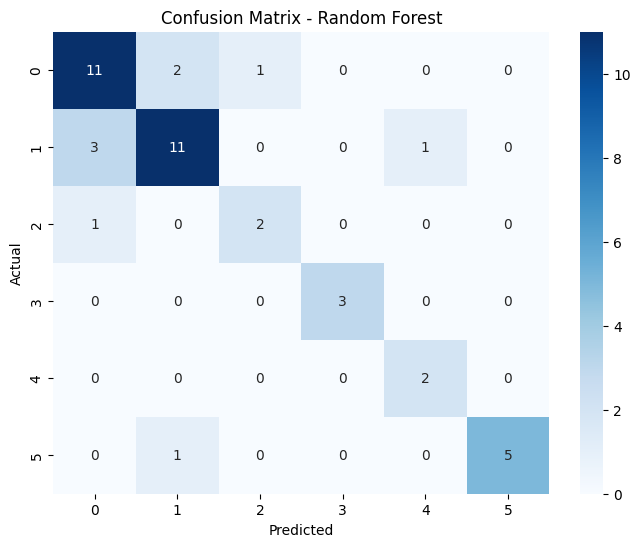


--- KNN ---
Accuracy: 0.721
Precision: 0.681
Recall: 0.721
F1-score: 0.694
Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.67      0.80      0.73        15
           3       0.00      0.00      0.00         3
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.72        43
   macro avg       0.65      0.60      0.61        43
weighted avg       0.68      0.72      0.69        43



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

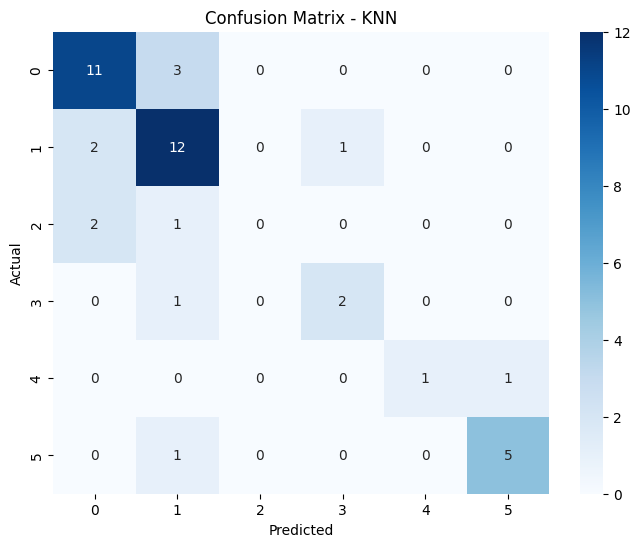


--- SVM ---
Accuracy: 0.698
Precision: 0.737
Recall: 0.698
F1-score: 0.712
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.64      0.69        14
           2       0.77      0.67      0.71        15
           3       0.17      0.33      0.22         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.86      1.00      0.92         6

    accuracy                           0.70        43
   macro avg       0.67      0.69      0.68        43
weighted avg       0.74      0.70      0.71        43



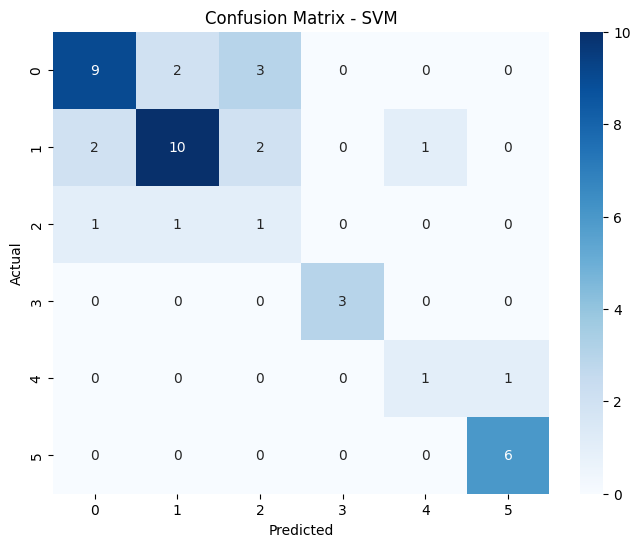

In [50]:
# 4. Model Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 4.1 Evaluate - use as example for each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.3f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.3f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

  # 4.2 Confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

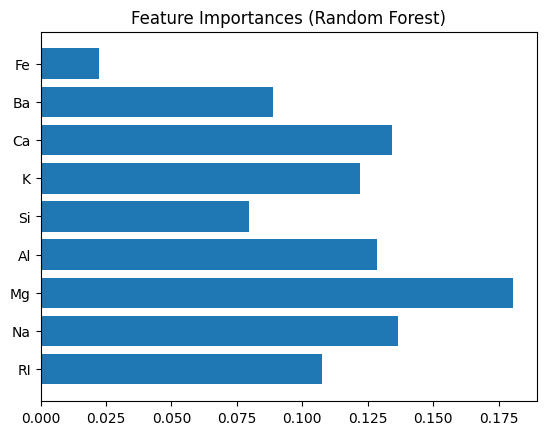

In [51]:
# 5. Reporting

importances = models["Random Forest"].feature_importances_
feat_names = X.columns
plt.barh(feat_names, importances)
plt.title("Feature Importances (Random Forest)")
plt.show()

In [52]:
# Trial at back-end

feature_names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

import pandas as pd

new_data = pd.DataFrame([[1.516, 13.0, 3.6, 1.36, 72.73, 0.48, 7.83, 0.0, 0.0]],
                        columns=feature_names)

new_data_scaled = scaler.transform(new_data)
predicted_class = clf.predict(new_data_scaled)
print("Predicted Glass Type:", predicted_class[0])

Predicted Glass Type: 2


In [53]:
import pickle

# Suppose your trained model is named 'model'
filename = "glass_model.pkl"

# Save model to a pickle file
with open(filename, "wb") as file:
    pickle.dump(model, file)

In [54]:
import pickle

# Suppose your trained model is named 'scaler'
filename = "glass_scaler.pkl"

# Save model to a pickle file
with open(filename, "wb") as file:
    pickle.dump(scaler, file)